**Основы статистики. Часть 1. Неделя 2.**  
[Курс](https://stepik.org/course/76/syllabus) на Stepik.

Автор: **Анатолий Карпов**  
<img src="imgs/karpov.jpg" title="Анатлолий Карпов" width="200" height="200"/>

Конспектировал: **Илья Филимонов** (GiHub: [@IsFilimonov](https://github.com/IsFilimonov))  

<img src="imgs/IsFilimonov.png" title="Илья Филимонов" width="200" height="200"/>

  ---

# Введение

[Адрес](https://gallery.shinyapps.io/dist_calc/) сайта для рассчета p-уровня значимости.

Данные:
- ГС - генеральная совокупность (все возможные экземплряры).
- Выборка - это кусочек из ГС.

Если работаем с ГС, то:
- $M_{x}$ ($\mu$ или мю)  - Среднее значение ГС
- $\sigma$ (сигма) - "среднеквадратичное отклонение" ГС

Если работаем с ВЫБОРКОЙ, то:
- $\bar{X}$ - Среднее значение выборки
- $sd_{x}$ – "стандартное отклонение" выборки (оно тоже среднеквадратичное)

Про изменчивость признаков:
- $(x1-x2)\uparrow$ $ \Rightarrow $ $t \uparrow$ (чем больше разница между средними в выборках, тем больше t-критерий)
- $sd \downarrow$ $ \Rightarrow $ $t \uparrow$
- $n \uparrow$ $ \Rightarrow $ $t \uparrow$
- $t \uparrow$ $ \Rightarrow $ $p \downarrow$

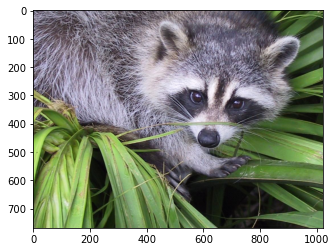

In [1]:
'''Импортируем необходимые библиотеки для работы'''
# Стандартный модуль Python >= 3.4 для расчета математической статистики числовых данных. 
# Ориентирован на уровень графических и научных калькуляторов.
import statistics
# Стандартный модуль реализует генераторы псевдослучайных чисел для различных распределений
from random import randint
# Стандартный модуль обеспечивает доступ к математическим функциям, определенным стандартом C.
import math

# Библиотека, добавляющая поддержку больших многомерных массивов и матриц, вместе 
# с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.
import numpy as np
from numpy import random
# Open source библиотека на базе NumPy для выполнения научных и инженерных расчётов.
from scipy import (              
    misc, stats, ndimage)

# Библиотека для обработки и анализа данных с NumPy под капотом.
import pandas as pd

# Библиотека предоставляет набор методов статистического тестирования и моделирования, а также
# инструменты, предназначенные для анализа временных рядов (это также может быть использовано для прогнозирования).
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (
    pairwise_tukeyhsd, MultiComparison)
from statsmodels.graphics.factorplots import interaction_plot

# Библиотека для визуализации 2D данных, а также 3D графики. 
import matplotlib.pyplot as plt
# Более высокоуровневое API на базе библиотеки matplotlib.
import seaborn as sns

face = misc.face()
plt.imshow(face)
plt.show()

# T-распределение 

<center><img src="slides/week_2/week_2-02.png" title="slide 2" width="50%" height="50%"/></center>

`Распределение Стьюдента` (*t-distribution*) по сути представляет собой сумму нескольких нормально распределенных случайных величин. Чем больше величин, тем больше верятность, что их сумма будет иметь нормальное распределение.  
Таким образом, количество суммируемых величин определяет важнейший параметр формы данного распредения - число степеней свободы (*degrees of freedom* $df=n-1$).


<center><img src="imgs/t_test.png" title="T test" width="75%" height="75%"/></center>

Диаграмма взята из книги "Cтатистика для тех кто (думает что) ненавидит статистику".

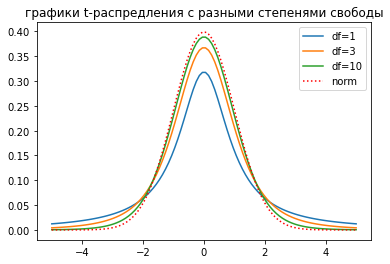

In [2]:
'''
График снизу показывает, как меняется форма распределения при увеличении количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.
'''
x = np.linspace(-5, 5, 100)
y1, y2, y3 = stats.t.pdf(x, df=1), stats.t.pdf(x, df=3), stats.t.pdf(x, df=10)
y4 = stats.norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

График плотности распределения Стьюдента, как и нормального распределения, является симметричным и имеет вид колокола, но с более «тяжёлыми» хвостами.

## Очень важный шаг

В видео лекциях я сказал, что мы используем t - распределение в ситуации небольшого объема выборки. Необходимо более подробно пояснить, зачем это нужно.

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально ([не обязательно](https://stepik.org/lesson/8077/step/7?unit=1357)) со средним $\mu$ и стандартным отклонением $\sigma$, и мы будем многократно извлекать выборки одинакового размера $n$, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$$\large z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

то эта величина $\large z$ будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения:

$$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$$

таким образом, в случае неизвестной $\sigma$ мы **всегда будем иметь дело с t - распределением.**  

На этом этапе вы должны с негодованием спросить меня: почему же мы применяли z - критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, $n > 30$) t - распределение совсем близко подбирается к нормальному распределению:

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности.

Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

Дополнительные тезисы:

- **Использование t-распределения уменьшает вероятность совершить ошибку первого рода, то есть отклонить нулевую гипотезу, когда она верна.**

- **Число степеней свободы — это разность числа наблюдений и числа оцененных параметров.**

[Пост](https://habr.com/ru/company/stepic/blog/311354/) на Habr-е о степенях свободы.

In [3]:
'''Пример
На выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: 
mu=10 и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости  (двусторонний) равен:
'''
t = -2
n = 15
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print("p = {:.3f}".format(p))

p = 0.065


# Сравнение двух средних. t-критерий Стьюдента

`t-критерий Стьюдента` — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига). Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

$$ t = \frac{\bar{X_1} - \bar{X_2}}{se}$$

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$

Откуда берётся такая формула $se$?:

$$ (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $$
 
То есть:

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $$

причем ответ на вопрос, почему верно это равенство, кроется в свойстве дисперсии: дисперсия суммы независимых случайных величин равна сумме их дисперсий. а отклонение - это корень из дисперсии. отсюда ваша последняя формула

## Примеры

Чаще всего критерий Стьюдента применяется для проверки равенства средних значений в двух выборках.

**Пример 1**. 
- Первая выборка — это пациенты, которых лечили препаратом А. 
- Вторая выборка — пациенты, которых лечили препаратом Б. 
- Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 
- Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики.

**Пример 2**. 
- Первая выборка — это значения некоторой характеристики состояния пациентов, записанные до лечения. 
- Вторая выборка — это значения той же характеристики состояния тех же пациентов, записанные после лечения. 
- Объёмы обеих выборок обязаны совпадать; более того, порядок элементов (в данном случае пациентов) в выборках также обязан совпадать. Такие выборки называются `связными`. 
- Требуется выяснить, имеется ли значимое отличие в состоянии пациентов до и после лечения, или различия чисто случайны.

**Пример 3**. 
- Первая выборка — это поля, обработанные агротехническим методом А. 
- Вторая выборка — поля, обработанные агротехническим методом Б. 
- Значения в выборках — это урожайность. 
- Требуется выяснить, является ли один из методов эффективнее другого, или различия урожайности обусловлены случайными факторами.

**Пример 4**. 
- Первая выборка — это дни, когда в супермаркете проходила промо-акция типа А (красные ценники со скидкой). 
- Вторая выборка — дни промо-акции типа Б (каждая пятая пачка бесплатно). 
- Значения в выборках — это показатель эффективности промо-акции (объём продаж, либо выручка в рублях). 
- Требуется выяснить, какой из типов промо-акции более эффективен.

### Задача 1

In [4]:
'''
0 гипотеза: среднее плавления 1 вида = среднее плавления 2 вида
Альт гипотеза: мы получили ценные результаты и среднее 1 вида <> среднее 2 вида
'''
array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
# K - половина интервала (в относительных единицах по отношению к СКО), в котором содержится p (в данном случае 95%) 
# всех значений для распределения Стьюдента с соответствующей степенью свободы. 
# Только здесь ошибка - вместо 'Mx' нужно 'N'.
# Вторая строка добавляет ещё один столбец (собственно доверит. интервалы уже в абсолютных единицах) в исходный датафрейм df.
p = 0.95
K = stats.t.ppf((1 + p)/2, df['N']-1)
df['interval'] = K * df['SE']

df

,Mx,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.795511
Выборка2,75.735,15.458102,20.0,3.456537,7.234614


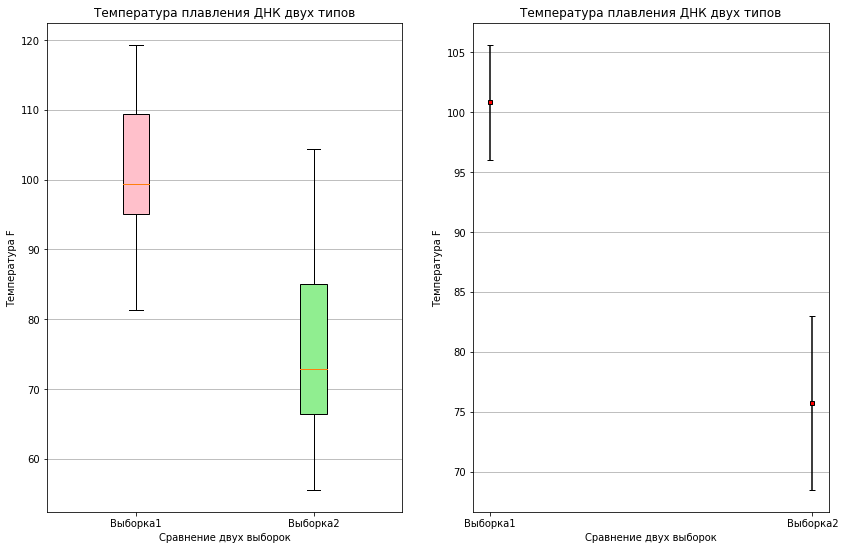

In [5]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

### Задача 2

В первом эксперименте для сравнения двух средних $\bar{X_{1}}=17$ и $\bar{X_{2}}=16$ применялся t-критерий Стьюдента, и эти различия оказались значимы ($p = 0,001$).  
Во втором исследовании, также при помощи t - критерия, сравнивались два средних $\bar{X_{1}}=17$ и $\bar{X_{2}}=36$ и эти различия не значимы при $p = 0,8$. В чем может быть причина таких результатов?

**Решение**:
- $(x1-x2)\uparrow$ $ \Rightarrow $ $t \uparrow$ (чем больше разница между средними в выборках, тем больше t-критерий)
- $sd \downarrow$ $ \Rightarrow $ $t \uparrow$
- $n \uparrow$ $ \Rightarrow $ $t \uparrow$
- $t \uparrow$ $ \Rightarrow $ $p \downarrow$

Следовательно, возможно, в первом эксперименте больше объем выборок и меньше изменчивость исследуемого признака.

### Задача 3

Ваш друг Ярослав изучает статистику и недавно прочитал статью, в которой исследовались различия между средними значениями числа рибосом двух различных типов бактерий. Ярослав просит Вас объяснить ему, что означает высказывание: "95% доверительный интервал **для разности между средними** значениями рибосом двух типов бактерий $\mu_{тип№1} -\mu_{тип№2}$ оказался равен от 100 до 300”. 

**Решение**:
- <font color="red">Число рибосом у второго типа бактерий в среднем на 100-300 рибосом превышает число рибосом у первого типа.</font>
- <font color="green">Число рибосом у первого типа бактерий в среднем на 100-300 рибосом превышает число рибосом у второго типа.</font>
- <font color="red">Среднее значение числа рибосом у первого типа бактерий равняется 100, а у второго 300.</font>
- <font color="red">Эти данные не позволяют отклонить нулевую гипотезу о равенстве средних значений μtype1 = μtype2.</font>

### Задача 4
Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу $\bar{x}\pm 1,96*\frac{sd_{x}}{\sqrt{n}}$. 

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида: $\bar{X}=89.9$, $sd=11.3$ ,$n=20$.

Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96. 

Давайте воспользуемся [таблицей](https://www.medcalc.org/manual/t-distribution.php) критических значений для t - распределения для нахождения нужного t - значения.

В этой таблице нас интересует столбец, где A=0,95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

**Решение**:  

Чтобы рассчитать доверительный интервал для t-распределения мы опираемся на формулу: $\bar{X}\pm K*\frac{sd_{x}}{\sqrt{n}}$, где $K=1.96$ мы обычно брали в случае 95% доверительного интервала при нормальном распределении.

Переходим в [таблицу](https://www.medcalc.org/manual/t-distribution.php) критических значений для t-распределения. В условии сказано использовать степень свободы $df=n-1=20-1=19$. И так как нас интересуют 95% данных, ищем значение коэффициента на пересечении $df$ и $0.95$. $K=2.093$ 

Теперь уже подставляем в интервал:
$$[\bar{X}-2.093*\frac{sd_{x}}{\sqrt{n}},\bar{X}+2.093*\frac{sd_{x}}{\sqrt{n}}]=[89.9-2.093*2.53,89.9+2.093*2.53]=[84.6,95.2]$$




In [6]:
'''
Решение задачи 4 программно
'''
mean = 89.9
sd = 11.3
n = 20 
df = n - 1  # степень свободы
p = 0.95  # 95% доверительный интервал
alpha = 1-p
se = sd/n**0.5  # стандартная ошибка

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print("{}".format(сonfidence_interval))

(84.61143720745503, 95.18856279254499)


### Задача 5



<center><img src="imgs/we02ex05.png" title="Picture for 5 exercise" width="50%" height="50%"/></center>

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.  
Средний возраст мужчин $\bar{X_{м}}=45$, $sd_{м} = 9$, а средний возраст женщин $\bar{X_{ж}}=34$, $sd_{ж} = 10$.

**Примечание**

Рассчитав t - значение вы можете сравнить его с табличным, чтоб принять статистическое решение: отклонять ли нулевую гипотезу. http://www.medcalc.org/manual/t-distribution.php

Опять же обратимся к таблице t - значений, как и в предыдущем задании найдем критическое значение для нашего эксперимента (на пересечении строки c нужным числом степеней свободы  и столбца, где P=0.05).
Если рассчитанное вами t-значение больше табличного: отклоняем нулевую гипотезу при p < 0.05.

Также участник курса Vitaliy Vavilov  доработал сайт, где можно рассчитывать площадь под кривой в ситуации различных распределений и с различным числом степеней свободы https://vavilovva.shinyapps.io/dist_calc/.

**Решение:**



Имеем $\bar{X_{м}}=45$, $sd_{м} = 9$, а средний возраст женщин $\bar{X_{ж}}=34$, $sd_{ж} = 10$. В обоих случаях $n=100$.

Если $ t = \frac{\bar{X_1} - \bar{X_2}}{se}$, $ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $, при условии, что $se=\frac{sd_{x}}{\sqrt{n}}$, тогда

$$ t = \frac{45 - 34}{\sqrt{(\frac{9}{\sqrt{100}})^2+(\frac{10}{\sqrt{100}}})^2} = \frac{11}{\sqrt{0.81+1}}=8.18 $$

Из [таблицы](https://www.medcalc.org/manual/t-distribution.php) мы узнаем критическое значение $2.871$ для нашего эксперимента, которое лежит на пересечении $n=100$ и $p=0.05$. Ввиду того, что полученное t-значение определенно больше $8.18 > 2.871$. Отсюда делаем вывод, что мы отклоняем нулевую гипотезу о равенстве средних при $p<0.05$.

# Проверка распределения на нормальность. QQ-Plot

Если коротко, то `гистограмма` - это один из графических способов сказать, что данные поступают из нормального распределения, но гистограмма может быть обманчивой, поскольку изменение количества бинов изменяет форму распределения, и это может привести к некоторой путанице. Нам нужен лучший способ определить, поступают ли данные из нормального распределения.

`График квантиль-квантиль` (*quantile-quantile*, qq-plot) - это график рассеяния, на котором мы наносим значения набора данных в зависимости от значений нормального распределения для квантилей, определенных из набора данных. Координата &y& графика qq - это значения набора данных, координаты &x& - значения из нормального распределения.

Так же стоит остерегаться выбросов, так как они сильно влияют на наши рещультаты.

[Хороший материал](https://www.machinelearningmastery.ru/normality-testing-the-graphical-way-20902abd8543/) с примерами о qq-plot.

<center><img src="imgs/is_normal_by_qq.png" title="QQ plots" width="75%" height="75%"/></center>

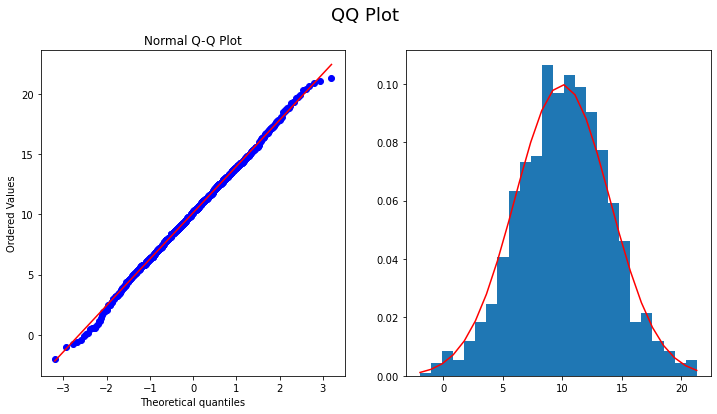

In [7]:
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')
 
plt.show()

# Однофакторный дисперсионный анализ

Хорошая [статья](https://r-analytics.blogspot.com/2013/01/blog-post.html) о дисперсионном анализе.

Это продолжение темы сравнения средних в выборках. Просто теперь групп, которые мы сравниваем не две, а больше. t-критерий Стьюдента (равно как и его непараметрические аналоги) позволяет сравнивать **только две группы**, однофакторный дисперсионный анализ (*One Way ANalysis Of VAriance*, *ANOVA*) - 2 и больше.

Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется `независимой переменной`. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется `зависимая переменная`. 

$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$

Теоретическое распределение F-значения в дисперсионном анализе не является нормальным, а подчиняется `распределению Фишера` (F distribution).

В книге: "Statistics Unplugged" автора: Sally Caldwell, наглядно описан ход рассуждний.

<center><img src="imgs/ANOVA_1.png" title="ANOVA 1 slide" width="50%" height="50%"/></center>

<center><img src="imgs/ANOVA_2.png" title="ANOVA 2 slide" width="50%" height="50%"/></center>

<center><img src="imgs/ANOVA_3.png" title="ANOVA 3 slide" width="75%" height="75%"/></center>

<center><img src="imgs/ANOVA_4.png" title="ANOVA 4 slide" width="50%" height="50%"/></center>

<center><img src="imgs/ANOVA_5.png" title="ANOVA 5 slide" width="75%" height="75%"/></center>

<center><img src="imgs/ANOVA_6.png" title="ANOVA 6 slide" width="50%" height="50%"/></center>

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
p=0.008000000000000002 , Итог: отклоняем нулевую гипотезу


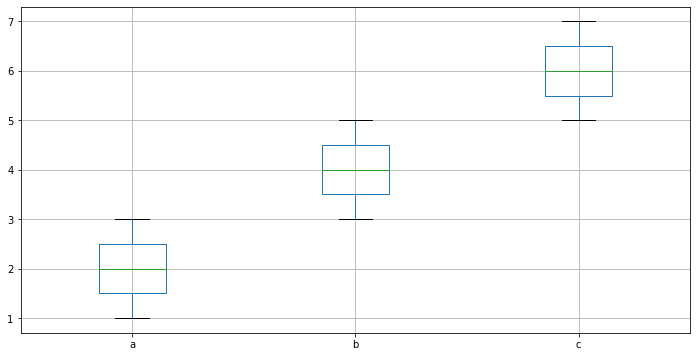

In [8]:
# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()

print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)

print("p={} , Итог: {}".format(
    p,
    "отклоняем нулевую гипотезу" if p < 0.05 else "НЕ отклоняем нулевую гипотезу"
))

## Задача

Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) вы получили F = 3.5. Принимаем или отклоняем нулевую гипотезу о равенстве средних?

**Решение:**  
Предположим, что верна нулевая гипотеза $H_{0}$ и, что все 4 выборки (по 5 наблюдений в каждой) взяты из одной генеральной совокупности. Нам нужно оценить в скольких случаях из множества экспериментов по извлечению случайным образом 4 групп по 5 значений в каждой - мы будем получать такое F-значение (такое соотношение различий между группами и внутри групп - SSB/SSB).

Число степеней свободы ($df_{SSB}$) для межгрупповой суммы квадратов ($SSB$) у нас будет равно $(n_{\text{групп}} - 1) = 4 - 1 = 3$.  
Число степеней свободы ($df_{SSW}$) для суммы квадратов внутри групп ($SSW$) у нас будет равно $(n_{\text{групп}} * (n_{\text{элементов в каждой группе}}-1))$ или $(N_{\text{общее наблюдений}} - n_{\text{групп}}) = 4 * (5-1) = 16$.

Задав эти значения ($df_{SSB} \rightarrow  df-1$ и $df_{SSW} \rightarrow  df-2$) в [калькуляторе](https://gallery.shinyapps.io/dist_calc/) (определив форму F-кривой) и полученное F-значение (a), получим вероятность получить такое значение при многократных повторениях эксперимента (Probability-value):
<center><img src="imgs/ex_2.png" title="Distribution calculator" width="75%" height="75%"/></center>

Если значение **P**_robability-value будет меньше 5% - то гипотезу о том, что мы работаем с одной и той же генеральной совокупностью придется отвергнуть, если выше - принять!

**На заметку:**  
$$F = \frac{\frac{ssb}{ssb_{deg}}}{\frac{ssw}{ssw_{deg}}}$$
$$df_{1} = ssb_{deg} \;\;\;\;\;\; df_{2} = ssw_{deg}$$


In [9]:
'''Решение на Python'''
F = 3.5
df_ssb = 3
df_ssw = 16

print("{}".format(
    stats.f.sf(F, df_ssb, df_ssw)
))

0.040052541494826094


## Немного об обозначениях в дисперсионном анализе

Когда мы делим значение межгрупповой суммы квадратов на соответствующее число степеней свободы (число групп минус один), мы тем самым усредняем полученный показатель. Усредненное значение межгрупповой суммы квадратов называется `межгрупповым средним квадратом`.

$$MS_{bg}=\frac{SSB}{df_{bg}} \;\;\;\;\;\; df_{bg}=m-1$$

Отношение внутригрупповой суммы квадратов к соответствующему числу степеней свободы (число всех наблюдений минус число групп) — это `внутригрупповой средний квадрат`.

$$MS_{wg}=\frac{SSW}{df_{wg}} \;\;\;\;\;\; df_{wg}=N-m$$

Поэтому формула F-значения (F-отношение) часто записывается:
$$F=\frac{MS_{bg}}{MS_{wg}}$$

**Теоретическая задача**

- <font color="green">Чем больше дисперсия внутри групп, тем больше значение внутригруппового квадрата (при неизменном количестве наблюдений)</font> - Давайте разбираться. Внутригрупповой средний квадрат $MS_{wg}=\frac{SSW}{df_{wg}}$, где  
$SSW=n_{\text{групп}} * (n_{\text{элементов в каждой группе}}-1)$ это сумма квадратичных отклонений от среднего **внутри группы;**    
$df_{wg}=N-n_{\text{групп}}$ соответствующее число степеней свободы (число всех наблюдейний минус число групп).   
В предположении неизменности числа групп и общего числа наблюдений, будут изменяться только внутригрупповые дисперсии для каждой группы, а значит и общая внутригрупповая сумма квадратов (SSW), что неизменно приведёт к росту внутригруппового квадрата (при росте SSW). 

- <font color="green">Общая сумма квадратов, деленная на число всех наблюдений минус один — это и есть дисперсия, рассчитанная для всех наших наблюдений без учета деления на группы</font> - верно, поскольку именно так определяется выборочная дисперсия (вспоминаем, что делим на число наблюдений в выборке минус один): 
$$D_{sample}=\frac{\sum\limits_{i=1}^N (x_i - \bar X)^2}{N-1},$$ 
то есть такая дисперсия, как если бы мы забыли о существовании деления наблюдений на группы и работали с ними как с единственной выборкой.

- <font color="red">Чем больше значение внутригруппового квадрата, тем обязательно больше значение межгруппового квадрата</font> - Легко показать, что это не так, эти значения не зависят друг от друга, а если бы зависели, то смысл применения F-критерия отпал бы сам собой.

- <font color="red">Чем меньше значение F отношения, тем больше шансов отклонить нулевую гипотезу (при сравнении трех групп по 10 наблюдений в каждой)</font> - Чем меньше значение F-критерия и при неизменных числах, характеризующих сравниваемые группы (их число m и общее число наблюдений N), тем большая площадь лежит по правую сторону от F-значения, а значит тем большее значение принимает p-уровень значимости. При анализе графика распределения Фишера, кстати, важно помнить, что мы рассчитываем вероятность p только в правом хвосте, то есть P(X>F) и то, что все F-значения всегда положительны.

- <font color="red">При помощи дисперсионного анализа можно сравнить между собой только 2 группы</font> - Дисперсионный анализ позволяет сравнивать между собой не только две группы, но и множество групп. Обратите внимание даже на формулы, они рассчитаны на m групп и N наблюдений.


## Задача

Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных терапий.

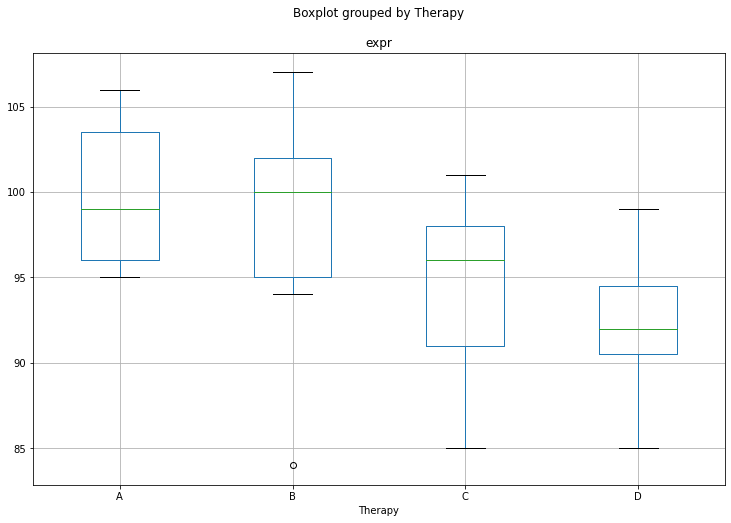

In [10]:
def ssw(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    return np.sum([
        (
            main_data.loc[main_data[group_col] == group, value_col] -
            main_data.loc[main_data[group_col] == group, value_col].mean()
        ) ** 2
        for group in group_names
    ])


def ssb(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    overall_mean = main_data[value_col].mean()
    return np.sum([
        len(main_data.loc[main_data[group_col] == group, value_col]) * (
            main_data.loc[main_data[group_col] == group, value_col].mean() -
            overall_mean
        ) ** 2
        for group in group_names
    ])


data = pd.read_csv('data/genetherapy.csv')
groups = data['Therapy'].unique()
subsets = [data.query('Therapy == @group')['expr'] for group in groups]

pd_boxplot = data.boxplot('expr', by='Therapy', figsize=(12, 8), grid=True)

In [11]:
ssb_df = len(groups) - 1
ssw_df = data.shape[0] - len(groups)

SSW = ssw(data, 'Therapy', 'expr')
SSB = ssb(data, 'Therapy', 'expr')

# Метод однофакторного дисперсионного анализа
f_val, p_val = stats.f_oneway(*subsets)

anova_results = pd.DataFrame([
{
        'Df': ssb_df,
        'Sum Sq': '{0:.2f}'.format(SSB),
        'Mean Sq': '{0:.2f}'.format(SSB / ssb_df),
        'F-value': '{0:.2f}'.format(f_val),
        'p-value': '{0:.4f}'.format(p_val),
    },
    {
        'Df': ssw_df,
        'Sum Sq': '{0:.2f}'.format(SSW),
        'Mean Sq': '{0:.2f}'.format(SSW / ssw_df),
        'F-value': '',
        'p-value': '',
    },
], index=['Therapy', 'Residuals'])

print(anova_results)

           Df   Sum Sq Mean Sq F-value p-value
Therapy     3   560.72  186.91    8.04  0.0002
Residuals  56  1302.27   23.25                


<center><img src="slides/week_2/week_2-21.png" title="Slide 21" width="75%" height="75%"/></center>
 
**Независимая переменная** (НП) - тип терапии (Therapy), **зависимая переменная** (ЗП) - уровень экспрессии генов.

Теперь ознакомимся с результатами дисперсионного анализа.  
Для НП рассчитаны число степеней свобод ($Df=m-1=4-1=3$) и сумма квадратов (Sum sq), она же SSB. Если мы разделим $\frac{SSB}{df}=\text{Mean sq}$, то получим средний показатель суммы квадратов межгрупповой.  
В качестве остатков (Residuals) выступает та часть изменчивости, которая выступает внутри групп (SSW). Чтобы убедиться в этом $df=N-m=60-4=56$, где N - число наблюдений, а m - число групп. Если мы $\frac{SSW}{df}=23.25=\text{Mean sq}$.  
И самое интересное, F-значение - отношение межгрупповой изменчивости к внутригрупповой. И вспомня, как выглядит распределение Фишера, то мы довольно сильно отклонились от его основной левой части.  
p-значение нам говорит, что получить такое отклонение мы могли бы получить с вероятностью, смело позволяющей нам отклонить $H_{0}$ нулевую гипотезу. Это говорит нам о том, что **по крайней мере два средних отличаются между собой (F(3,56)=8.04, p<0.05)**.

# Множественные сравнения в ANOVA

В отличие от t-критерия, позволяет сравнивать средние значения трёх и более групп. Разработан Р. Фишером для анализа результатов экспериментальных исследований. В литературе также встречается обозначение ANOVA (от англ. **AN**alysis **O**f **VA**riance) - дисперсионный анализ.

Получается, когда мы просто делаем однофакторный ANOVA, мы можем узнать есть ли вообще какие-то значимые отличия (как минимум между двумя группами). Но чтобы понять какие именно группы отличаются между собой, нам уже нужно делать попарное сравнение. И тут нужно будет использовать **поправку на множественные сравнения**.

Если мы многократно увеличиваем количество групп, которые будут участвовать в нашем исследовании и которые мы будем сравнивать между собой, то **вероятность получить хотя бы одно значимое различие, которое на самом деле не существует, очень сильно увеличивается и стремится к единице**.

Для вычисления попарных сравнений используется формула `сочетания` из комбинаторики:
$$C_n^m = \frac{n!}{(n-m)!\cdot m!}$$
где $n$ - всего элементов в выборке, а $m$ - количество выбираемых.  
Примечание: A-B то же сочитание, что и B-A.

In [12]:
def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание    
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2)/N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = stats.t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)

In [13]:
def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия
    
    repeat, n_samples, sample_size = количество повторов, количество выборок в каждом повторе, размер выборки
    
    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)
    
    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, normalize=False, labels=unique, autopct='%.0f%%')

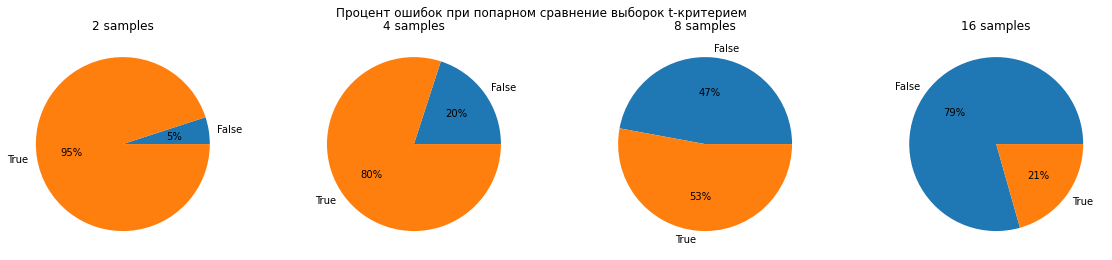

In [14]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 100, ax)
    ax.set_title(f'{n} samples')

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **48%**. **16** выборок дают увеличение ошибки до **81%** (почти в **16** раз), что совершенно неприемлемо.

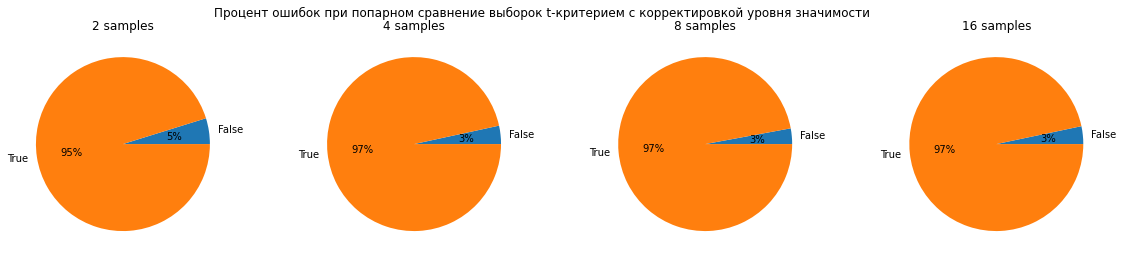

In [15]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2)
    pair_t_test(1000, n, 100, ax, alpha)
    ax.set_title(f'{n} samples')

`Поправка Бонферрони` - является одним из наиболее простых и известных способов контроля над групповой вероятностью ошибки. Многие критикуют ее за консервативность, которая имеет меньше вероятность найти реальные значения. **По сути мы уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**. Но и не принять поправку тоже не правильно, а принимать Бонферрони - не очень хорошо.    


<center><img src="imgs/error_types.jpeg" title="Type errors" width="30%" height="30%"/></center>

Для преодоления проблем, связанных с низкой мощностью метода Бонферрони, в 1978 г. Стур Холм (Holm) предложил гораздо более мощную его модификацию (часто этот метод называют еще [методом Холма-Бонферрони](https://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method)).

## Критерий Тьюки (Tukey HSD)

Вычисление критерия Тьюки:

$\displaystyle q = \frac{\overline x_B - \overline x_A}{SE}$, при этом $\displaystyle SE = \sqrt \frac{MS_w}{n}$, где $\displaystyle MS_w$ - внутригрупповая дисперсия.

Приведённая формула верна для случаев, когда все сравниваемые группы содержат одинаковое число наблюдений $n$. Если же сравниваемые группы неодинаковы по размеру, то согласно [этого](https://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm), расчёт производится для каждой пары групп независимо (т.е. для групп $i$,$j$):

$$SE_{ij} = \displaystyle\sqrt{\frac{MS_{{w}_{ij}}}{2}\left (\frac{1}{n_i}+\frac{1}{n_j}\right )}$$

Для расчёта доверительного интервала используется не T-распределение, а Studentized range distribution со степенями свободы 2 и $n_i + n_j - 2$. Например, 95% довертельный интервал:  
$$\overline x_i - \overline x_j \pm q_{(0.05;2;n_i + n_j - 2)}{SE}_{ij}$$

In [16]:
data_stepik = pd.read_csv('data/genetherapy.csv')

MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


В завершении нашего разговора о проблеме множественных сравнений советую вам посмотреть интересный доклад на эту тему ([ссылка](https://www.youtube.com/watch?t=1852&v=1fKaq9aN0MQ))!

Аннотация доклада:
Статистика и плохая наука: как поправка на множественные сравнения объясняет парадоксальные результаты исследований

Лектор: Александр Панчин — кандидат биологических наук, окончил факультет биоинженерии и биоинформатики МГУ им М.В. Ломоносова и является старшим научным сотрудником Института проблем передачи информации РАН.


# Многофакторный ANOVA
## Двухфакторный дисперсионный анализ (Two-way analysis of variance)

Взаимодействие факторов в дисперсионном анализе означает, что влияние одного фактора по-разному проявляется на зависимую переменную в зависимости от градаций другого фактора.

Причиной отклонения нулевой гипотезы в многофакторном дисперсионном анализе (о равенстве средних во всех группах) может стать:
- Значимый эффект одного из фактора
- Значимое взаимодействие факторов
- Значимый эффект для всех факторов

Заметные выбросы могут значительно повлиять на результаты дисперсионного анализа, так как могут нежелательно повлиять на значения средних межгрупповых и внутригрупповых квадратов (особенно в случае небольшого количества наблюдений).

<center><img src="slides/week_2/week_2-24.png" title="Slide 24" width="50%" height="50%"/></center>

Две независимые переменные: возраст (пожилые, молодые) и дозировка лекарства (высокая, низкая). Итого 4 группы.  
Зависимая переменная: экспрессия генов (expr).

$$SS_{\text{total}} = SSW + SSB_A + SSB_B + SSB_A \cdot SSB_B$$

Подробное [пошаговое объяснение](https://www.youtube.com/playlist?list=PLWtoq-EhUJe2TjJYfZUQtuq7a0dQCnOWp) метода. Внятно показано и как получить $SSB_A$ $SSB_B$, и как интерпретировать результаты. Советую.

### Задача
Решение задачи выше на питоне без статмоделей по [статье](http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/).

               sum_sq  df          F      PR(>F)
age        197.452754   1    7.44984  0.00831345
dose        16.912241   1   0.638094    0.427552
age:dose     0.927077   1  0.0349784    0.852272
Residual  1590.257424  60        NaN         NaN


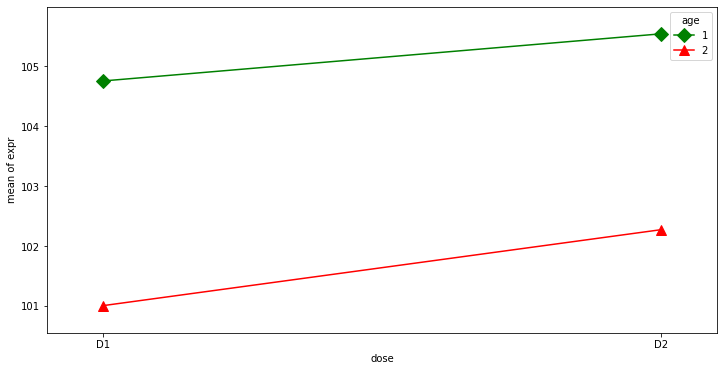

In [17]:
data=pd.read_csv('data/atherosclerosis.csv', sep=',')

#Картинка
fig=interaction_plot(data.dose,data.age,data.expr,colors=['green','red'], markers=['D','^'], ms=10)

#Степени свободы
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2

#Общее среднее
grand_mean = data['expr'].mean()

#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w

#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

In [18]:
'''
Решение задачи с помощью статмодели
'''
data=pd.read_csv('data/atherosclerosis.csv', sep=',')

model = ols(formula="expr ~ age*dose", data=data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
dose,16.912241,1.0,0.638094,0.427552
age,197.452754,1.0,7.449841,0.008313
age:dose,0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


**Вывод:** Большая часть изменчивости (PR(>F), 0.008) обуславливается фактором возраста (age, sum_sq). А фактор дозировки (dose) и внутригрупповая изменчивость (SSW=26.08) оказались не столь значительные. И, действительно, p-уровень значимости оказался <0.05 только в ситуации возраста наших испытуемых.  
Значимый эффект для фактора возраста пациентов (F(1,61)= 7.57, p<0.05).  
Незначимый эффект для фактора дозировки (F(1,61)= 0.64, p>0.05).  
Глядя на график мы видим, что молодые пациенты оказались с более высоким показателем зависимой переменной. Средние значения для молодых выше, чем для пожилых.

## Пример 2

<center><img src="slides/week_2/week_2-27.png" title="Slide 27" width="50%" height="50%"/></center>

Две независимые переменные: инъекция (да, нет) и пол (женский, мужской). Итого 4 группы.
Зависимая переменная: экспрессия генов (var4).

In [19]:
'''
Решение задачи с помощью статмодели
'''
data=pd.read_csv('data/birds.csv', sep=',')

model = ols(formula="var4 ~ hormone*sex", data=data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
hormone,0.847472,1.0,0.086528,0.769653
sex,0.119762,1.0,0.012228,0.912318
hormone:sex,89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


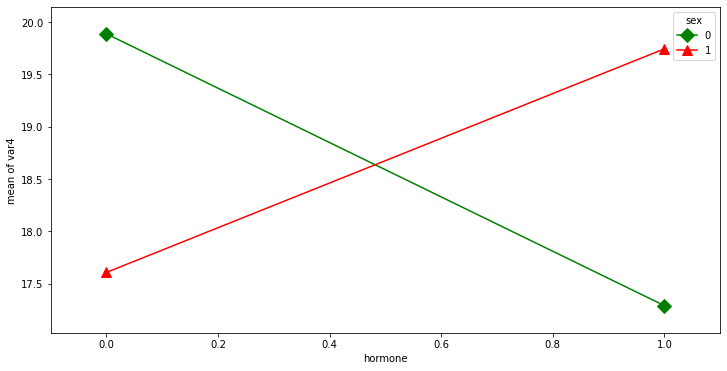

In [20]:
fig=interaction_plot(data.hormone,data.sex,data.var4,colors=['green','red'], markers=['D','^'], ms=10)

**Вывод:** Мы видим, что ни фактор инъекции (hormone), ни фактор пола (sex) не оказали значимого влияния (PR(>F)) на нашу зависимую переменную (var4) и изменчивость (sum_sq), которая обуславливается этими факторами, очень невелика (0.85 и 0.12).  
Но взаимодействие этих факторов (hormone:sex) окозало довольно значимое влияние (PR(>F)=0.0037) и оттянуло на себя довольно большую часть изменчивости (Mean_sq=89.48).

### Задача

<center><img src="imgs/ex_3.png" title="Exercise 3" width="50%" height="50%"/></center>

Компания, разрабатывающая мобильные телефоны, перед выпуском двух новых моделей (№1 и №2), решила выяснить, как потенциальные пользователи воспринимают эти новинки . Для этого компания набрала фокус-группу (100 мужчин, 100 женщин) и попросила участников оценить дизайн новых моделей телефонов от 1 до 100. Чтобы проанализировать полученные результаты, был применен двуфакторный дисперсионный анализ (зависимая переменная - оценка испытуемых по 100-балльной шкале, независимые переменные (факторы) - номер модели и пол испытуемых).

**Решение:**  
- **A - значимый эффект только для фактора модели телефона.**  
Модель телефона №1 (отмечена на горизонтальной оси) была оценена и женщинами (красная линия), и мужчинами (синяя линия) одинаково (средняя оценка — около 80, отмечена на вертикальной оси).  Модель телефона №2 (отмечена на горизонтальной оси) была оценена и женщинами, и мужчинами тоже одинаково (и те, и другие оценили её в среднем где-то на 65). Отсюда делаем вывод, что значимый эффект на результат оказала именно модель телефона, а не различие пола испытуемых.
- **B - значимый эффект только для фактора пола участников исследования.**  
Женщины оценили модель №1 и модель №2 примерно одинаково высоко (средняя оценка — около 80), в то время как мужчины тоже оценили модель №1 и модель №2 одинаково, но меньше (средняя оценка — около 65). Значимый эффект обусловлен только полом испытуемых: женщины оценили обе модели одинаково выше, чем мужчины. 
- **C - значимый эффект для обоих факторов.**  
Модель №1 и женщины, и мужчины оценили по-разному. Модель №2 и женщины, и мужчины тоже оценили по-разному. А также мы можем видеть, что модель №1 была оценена обеими группами испытуемых выше, чем модель №2. Отсюда следует, что на результат оказали влияние и модель телефона, и пол (значимый эффект для обоих факторов).
- **D - значимое взаимодействие факторов.**  
Наблюдаем более высокую оценку для модели №2 по сравнению с оценкой модели №1 у мужчин и более низкую оценку модели №2 по сравнению с оценкой модели №1 у женщин. Такой график соответствует значимому взаимодействию факторов. 

## Гомогенность дисперсий

<center><img src="slides/week_2/week_2-29.png" title="Slide 29" width="50%" height="50%"/></center>

Дисперсионный анализ требует выполнения условий:
- нормальность распределения независимой переменной в каждой из групп;
- гомогенность дисперсий

`Гомогенность дисперсий` - требование, чтобы дисперсия была примерно одиннаковой в каждой из групп.

Дисперсионный анализ еще и тем хорош, что при достаточно большом количестве наблюдений (n>50) ANOVA устойчива к нарушению обоих этих требований.

Когда мы говорим о гомогенности дисперсий можно, сначала, построить box-plot и есть ли у нас заметные выбросы.  
И чтобы наверняка убедиться в гомогенности можно применить [тест Левена](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html#scipy.stats.levene) и проверить нулевую гипотезу $H_0$, что $D_1=D_2=D_n$ при p>0.05.  
Что касается графиков, то мы можем построить QQ-plot для каждой группы.

**Полезные комментарии читателей:**  
- Возник вопрос о проведении множественных сравнений в том случае, если дела совсем плохи: выборки  маленькие, распределены не нормально и дисперсии не гомогенны. Если в случае парных сравнений можно воспользоваться критерием Манна-Уитни, то как быть, если групп много и хочется рассмотреть несколько факторов? Как не напортачить со статистикой в этом случае, чего следует опасаться и какие материалы посоветуете посмотреть на эту тематику?  
- В случае с однофакторным дисперсионным анализом аналогом будет являться Ранговый дисперсионный анализ Краскела-Уоллиса.  
- Краскалл-Уоллис, как Вам справедливо ответили, наиболее очевидное решение данной проблемы. Однако можно попробовать привести данные к нормальному распределению. В моей практике часто встречались сильно асимметричные распределения, которые можно было легко привести к нормальному виду, взяв логарифм (или, реже, корень). Что касается неравенства дисперсий - то следует учесть, что чем меньше различаются объемы сравниваемых выборок, тем меньше этот фактор влияет на корректность результатов F-критерия (более подробное обсуждение этого факта на русском можно найти в книге Гласс Дж., Стэнли Дж. Статистические методы в педагогике и психологии. - М.: Прогресс, 1976). Более того, в современных статистических пакетах (SPSS или Statistica) есть критерии для попарных сравнений, учитывающие неравенство дисперсий. Но в целом - да, можно использовать Краскалла-Уоллиса. Однако с ним вот какая проблема: для попарного сравнения Вам все равно придется сравнивать группы попарно, т.е. пользоваться U-критерием Манна-Уитни (т.к. распределения не нормальные и дисперсии не равны), и тут снова встает проблема множественных сравненний... Так что лучше попробовать привести данные к нормальному виду, постараться (насколько это представляется возможным) уравнять численность групп (еще на этапе плаанирования эксперимента) и использовать дисперсионный анализ. Кроме того, насколько мне известно, непараметрических аналогов факторного дисперсионного анализа не существует (Краскалл-Уоллис - однофакторный).

# АБ тесты и статистика

A/B тесты - один из основных инструментов в продуктовой аналитике. Этот метод маркетингового исследования заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, где один или несколько показателей изменены для того, чтобы выяснить, какие из изменений улучшают целевой показатель. Например, мы можем поменять цвет кнопки для регистрации с красного на синий и сравнить, насколько это будет эффективно. 

Предлагаю вашему вниманию [интервью](https://www.youtube.com/watch?v=gljfGAkgX_o) с Никитой Маршалкиным, Data Scientist'ом ВКонтакте.

Затронуты темы:  
- Как работают системы сплитования
- Работают ли обычные статистические тесты на big data, и какие подводные камни там есть
- Особенности АБ тестов в социальных сетях
- Где научиться мастерски проводить АБ тесты

После интервью с Никитой мы собрали источники, которые он одобряет и использует в работе с A/B тестами (а некоторые даже написаны им лично!):

1. Крутая [книга](https://experimentguide.com/) о том, как спланировать и провести своё первое A/B тестирование
2. [Подборка](https://exp-platform.com/) примеров применения A/B тестов в индустрии: как топовая литература на тему, так и интервью от сотрудников крупных компаний, применяющих A/B тесты в работе
3. Пошаговый, написанный с Никитой в соавторстве [гайдлайн](https://medium.com/@vktech/practitioners-guide-to-statistical-tests-ed2d580ef04f?fbclid=IwAR0Q7Gb-YmHG0Cg28IMC6RdBcjwqM466HaB4c-CtpXd03N-XyNzv9N5sWF0) для создания A/B тестов на языке Python
4. [Статья](https://research.google/pubs/pub43157/), описывающая как определять, комбинировать и объединять метрики (и комбинации из 2-3 метрик) с высокой прогнозирующей способностью таким образом, чтобы уменьшать их число и снижать вариативность
5. [Работа](https://arxiv.org/abs/1404.7530), рассматривающая различные подходы к планированию и созданию рандомизированных экспериментов, чтобы не получить мнимые отличия на этапе дизайна
6. Краткие [конспекты докладов](https://research.fb.com/publications/top-challenges-from-the-first-practical-online-controlled-experiments-summit/) исследователей и практиков из области анализа данных с конференции KDD 2019, где можно почерпнуть новаторские решения в планировании экспериментов для бизнеса
7. Краткое [руководство](https://onlineuserengagement.github.io/) как правильно выстроить работу b2c: на какие метрики необходимо смотреть и как их учитывать для улучшения работы

В дополнение, вот еще [видео](https://www.youtube.com/watch?v=930l_Tc65Uo), чтобы понять зачем в бизнесе нужны АБ тесты. Из него следует взять на вооружение два вопроса, которые могут разрушить множество мифов о мегауспешных ИИ и прочих внедрениях:
- **Это статистически значимый результат?**
- **Где можно ознакомиться с методологией?**